<h1 style="text-align: center; color: blue;"> Sprint 7: Classification</h1>

In [54]:
#importamos las librerias necesarias
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [55]:
with open('wineNames.txt') as f:
    data = f.readlines()

In [56]:
attribute_lines = [line for line in data if line.strip().startswith(tuple(map(str, range(1, 14))))]
attribute_lines

['1. Title of Database: Wine recognition data\n',
 '2. Sources:\n',
 '       16147 Genoa, Italy.\n',
 '3. Past Usage:\n',
 '4. Relevant Information:\n',
 ' \t1) Alcohol\n',
 ' \t2) Malic acid\n',
 ' \t3) Ash\n',
 '\t4) Alcalinity of ash  \n',
 ' \t5) Magnesium\n',
 '\t6) Total phenols\n',
 ' \t7) Flavanoids\n',
 ' \t8) Nonflavanoid phenols\n',
 ' \t9) Proanthocyanins\n',
 '\t10)Color intensity\n',
 ' \t11)Hue\n',
 ' \t12)OD280/OD315 of diluted wines\n',
 ' \t13)Proline            \n',
 '5. Number of Instances\n',
 '6. Number of Attributes \n',
 '\t13\n',
 '7. For Each Attribute:\n',
 '8. Missing Attribute Values:\n',
 '9. Class Distribution: number of instances per class\n']

In [60]:
attributes = [line.split(")")[1].strip() for line in attribute_lines if ")" in line]
attributes

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [61]:
#agregamos la columna de la clase al inicio de la lista
attributes.insert(0, 'Class')

In [62]:
df = pd.read_csv('wineData.txt', header=None, names=attributes, index_col=False)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**EJERCICIO 1:** Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.

### Primer modelo: Regresión logística
### Segundo modelo: Arbol de decisión

**EJERCICIO 2:** Compara los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.

In [63]:
#dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

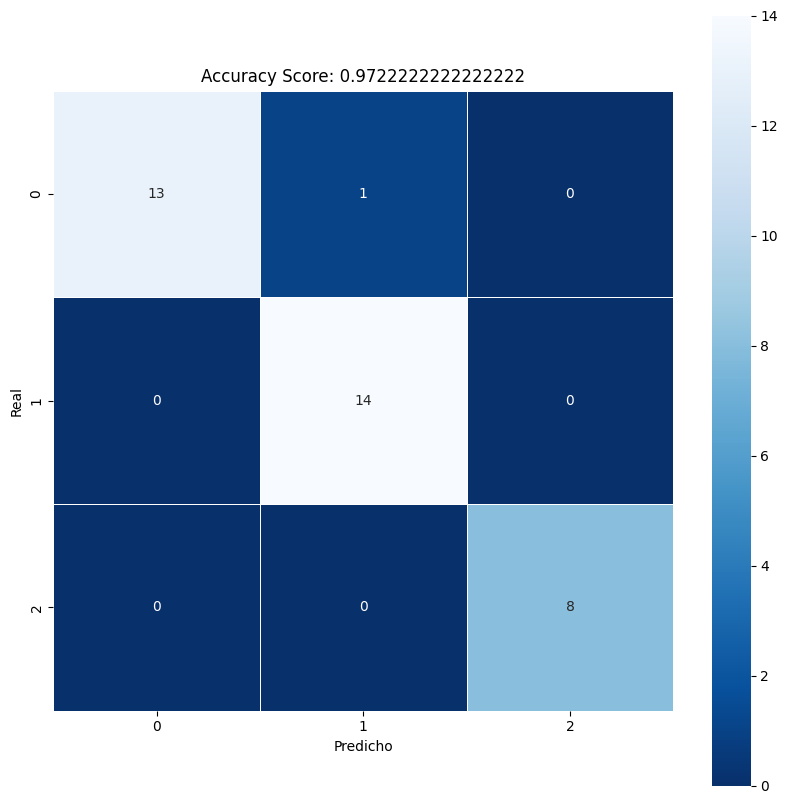

In [64]:
#entrenamos el modelo de clasificacion: regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

#visualizamos graficamente los resultados
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)))
plt.show()

### Análisis de los datos: Se observa que el modelo de regresión logística tiene un buen desempeño, un accuracy de 0.97, indica que el modelo es capaz de predecir correctamente el 97% de los casos. Abajo se muestra una tabla con los primeros 10 valores reales y los valores predichos por el modelo.

In [65]:
#vissualizamos los resultados en columnas
df_results = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
df_results.head(10)

,Real,Predicho
19,1,1
45,1,1
140,3,3
30,1,1
67,2,2
16,1,1
119,2,2
174,3,3
109,2,2
141,3,3


In [68]:
#Usaremos dos metricas avanzadas mas para evaluar el modelo, F1-score y AUC, son utiles cuando las clases estan desbalanceadas
# F1-score: es la media armonica entre precision y recall, un valor de 1 indica que el modelo es perfecto
# AUC: es el area bajo la curva ROC, un valor de 1 indica que el modelo es perfecto
from sklearn.metrics import f1_score, roc_auc_score

print('F1-score: {0}'.format(f1_score(y_test, y_pred, average='micro')))
#Para el caso de la metrica AUC, debemos usar la probabilidad de cada clase, no la prediccion.
y_prob = lr.predict_proba(X_test)
print('AUC: {0}'.format(roc_auc_score(y_test, y_prob, multi_class='ovr'))) #ovr: uno contra todos

F1-score: 0.9722222222222222
AUC: 0.9989177489177489


### Evaluando el modelo de regresion logistica con F1-score y AUC, se confirma un buen desempeño del modelo.

In [72]:
#entrenamos el modelo de clasificacion: arbol de decision
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9444444444444444

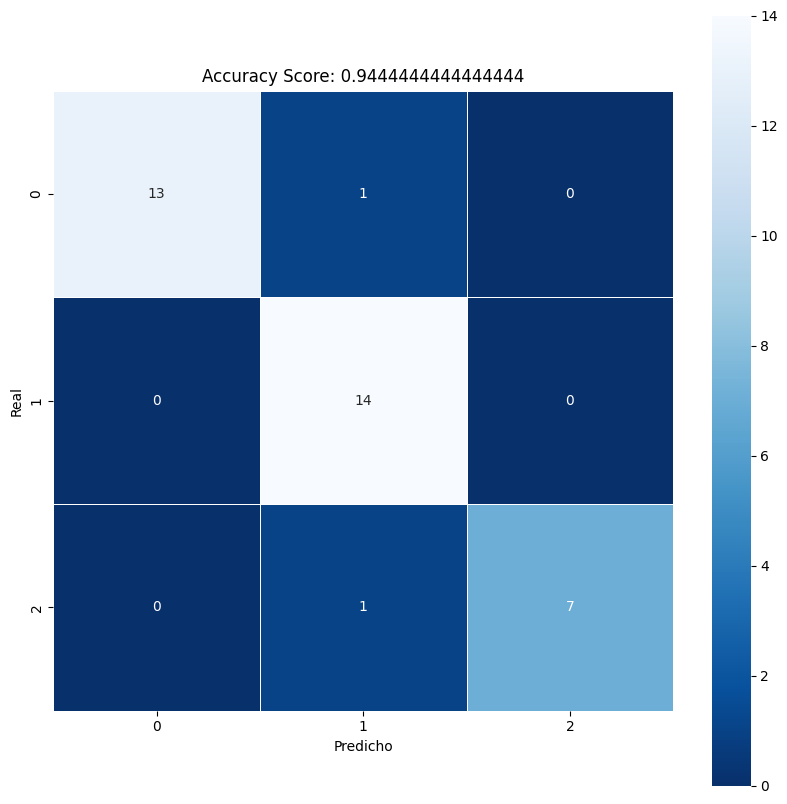

In [73]:
#visualizamos graficamente los resultados
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)))
plt.show()

### Análisis de los datos: Se observa que el modelo de árbol de decisión tiene un buen desempeño, con un accuracy de 0.94, indica que el modelo es capaz de predecir correctamente el 94% de los casos.


In [47]:
#vissualizamos los resultados en columnas
df_results = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
df_results[10:15]

,Real,Predicho
24,1,2
150,3,3
41,1,1
118,2,2
15,1,1


In [74]:
#calculamos las metricas avanzadas, F1-score y AUC
print('F1-score: {0}'.format(f1_score(y_test, y_pred, average='micro')))
y_prob = dt.predict_proba(X_test)
print('AUC: {0}'.format(roc_auc_score(y_test, y_prob, multi_class='ovr')))

F1-score: 0.9444444444444444
AUC: 0.9521103896103895


### En la tabla de arriba, el primer valor se clasifica realmente como 1 pero el modelo de arbol de decisión predice que pertenece a la clase 2. Aunque ambos modelos tienen un buen accuracy, el modelo de regresión logística es mejor entre ambos.

**EJERCICIO 3:** Entrena usando los diferentes parámetros que admiten para mejorar su predicción.

In [77]:
#Vamos a tunear los hiperparametros de ambos modelos para mejorar su rendimiento
#entrenamos el modelo de clasificacion: regresion logistica
from sklearn.model_selection import GridSearchCV

#Usando la técnica de GridSearchCV, podemos probar diferentes combinaciones de hiperparametros y quedarnos con la mejor.
#En este caso, probaremos diferentes combinaciones de los parametros C y penalty.
lr = LogisticRegression()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)

#visualizamos los resultados
print(clf.best_params_)

#usamos el mejor modelo para predecir
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.759 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.893 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.750 total time=   0.0s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, penalty=l

/home/hnavarro/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hnavarro/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

0.9722222222222222

### Se utilizó GridSearchCV para encontrar los mejores parámetros para el modelo de regresión logística. Se encontró que el mejor parámetro para C es 1 y el mejor parámetro para penalty es l2, sin embargo el accuracy no mejora, y podria deberse a un sobreajuste.

In [78]:
#entrenamos el modelo de clasificacion: arbol de decision
dt = DecisionTreeClassifier()
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf = GridSearchCV(dt, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)

#visualizamos los resultados
print(clf.best_params_)

#usamos el mejor modelo para predecir
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .......................max_depth=2;, score=0.862 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.857 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.897 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.893 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.857 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.931 total time=   0.0s
[CV 2/5] END .......................max_depth=3;, score=0.931 total time=   0.0s
[CV 4/5] END .......................max_depth=3;, score=0.929 total time=   0.0s
[CV 5/5] END .......................max_depth=3;, score=0.893 total time=   0.0s
[CV 3/5] END .......................max_depth=3;, score=0.893 total time=   0.0s
[CV 1/5] END .......................max_depth=4;, score=0.931 total time=   0.0s
[CV 3/5] END .......................max_depth=4;,

0.9444444444444444

### Muy similar con el modelo de regresión logística.

**EJERCICIO 4:** Compara su rendimiento utilizando la aproximación train/test o cross-validation.

In [88]:
#como ya lo hemos dividido en entrenamiento y prueba, ahora usaremos la tecnica de validacion cruzada para evaluar el modelo (cross validation)
from sklearn.model_selection import cross_val_score

#entrenamos el modelo de clasificacion: regresion logistica
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5) #conjuntos de datos no muy grandes cv 3 o 5
print(scores)

[0.88888889 0.94444444 0.94444444 1.         1.        ]
Accuracy: 0.956 (+/- 0.08)


### Se utilizó cross-validation para evaluar el modelo de regresión logística. Consistentemente se obtuvo un accuracy alto. Los scores en cada fold son muy similares, lo que indica que el modelo no está sobreajustado. 

In [89]:
#entrenamos el modelo de clasificacion: arbol de decision
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=5)
print(scores)

[0.94444444 0.80555556 0.88888889 0.91428571 0.82857143]


### Similar al modelo de regresión logística, el modelo de árbol de decisión tiene un buen desempeño con cross-validation. Los scores en cada fold son consistentes, lo que indica que el modelo no está sobreajustado.

**EJERCICIO 5:** Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)

In [93]:
#aplicamos la tecnica de muestreo, para balancear las clases
from imblearn.over_sampling import SMOTE

#oversampling: aumenta la clase minoritaria, duplicando los registros de la clase minoritaria
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

#entrenamos el modelo de clasificacion: regresion logistica
lr = LogisticRegression()
scores = cross_val_score(lr, X_sm, y_sm, cv=5)
print(scores)

[0.90697674 0.95348837 1.         1.         0.97619048]


#### Se aplicó la técnica de oversampling SMOTE para equilibrar las clases en el conjunto de datos. Tras entrenar un modelo de regresión logística con la validación cruzada de 5-folds en los datos balanceados, se obtuvo un rendimiento alto en todos los folds, con dos de ellos alcanzando una precisión perfecta del 100%. La precisión varió entre 90.70% y 100%, lo que indica un desempeño generalmente excelente del modelo en los datos balanceados.

In [94]:
#entrenamos el modelo de clasificacion: arbol de decision
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_sm, y_sm, cv=5)
print(scores)

[0.81395349 0.93023256 1.         0.97619048 0.88095238]


#### Se entrenó un árbol de decisión utilizando validación cruzada de 5-folds en datos balanceados, obteniendo un rendimiento variable entre los folds, con valores de precisión que oscilan entre81.40% y 100%. Esto indica un buen desempeño general, aunque con cierta variabilidad en la precisión entre los diferentes subconjuntos.